In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from create_plots import import_dataframe, show_stats, show_plots

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

Select the dataset name to evaluate:

In [2]:
result_files = [
    "A_10_1_results.csv",
    "A_20_2_results.csv",
    "A_30_3_results.csv",
    "A_norandom_40_1_results.csv",
    "A_norandom_40_2_results.csv",
    "A_norandom_40_3_results.csv",
    "A_norandom_40_4_results.csv",
    "B_20_1_results.csv",
    "C_20_1_results.csv",
    "D_scramble_results.csv",
    "E_psize_results.csv"
]
#indices go from 0 to 10

filename = result_files[0]

In [3]:
print("This evaluation is for: " + filename)

This evaluation is for: A_10_1_results.csv


In [4]:
df = import_dataframe("result_files/"+filename)
filename = filename.split("_results.csv")[0]
print(df.columns)

Index(['name', 'n_taxa', 'n_trees', 'n_reticulations', 'msa_size',
       'sites_per_tree', 'sampling_type', 'simulation_type', 'celine_params',
       'brlen_scaler', 'seqgen_params', 'near_zero_branches_raxml',
       'n_equal_tree_pairs', 'true_network_weirdness', 'true_network_path',
       'fixed_reticulation_prob', 'runtime_raxml', 'inferred_network_path',
       'likelihood_type', 'brlen_linkage_type', 'start_type', 'timeout',
       'n_random_start_networks', 'n_parsimony_start_networks',
       'runtime_inference', 'use_partitioned_msa', 'n_reticulations_inferred',
       'bic_true', 'logl_true', 'bic_inferred', 'logl_inferred', 'bic_raxml',
       'logl_raxml', 'rf_absolute_raxml', 'rf_relative_raxml',
       'rf_absolute_inferred', 'rf_relative_inferred', 'msa_patterns',
       'unrooted_softwired_network_distance',
       'unrooted_hardwired_network_distance',
       'unrooted_displayed_trees_distance',
       'rooted_softwired_network_distance',
       'rooted_hardwired_ne

# Original Simulated Dataset Statistics 

Total number of datasets: 200


<Figure size 1200x800 with 0 Axes>

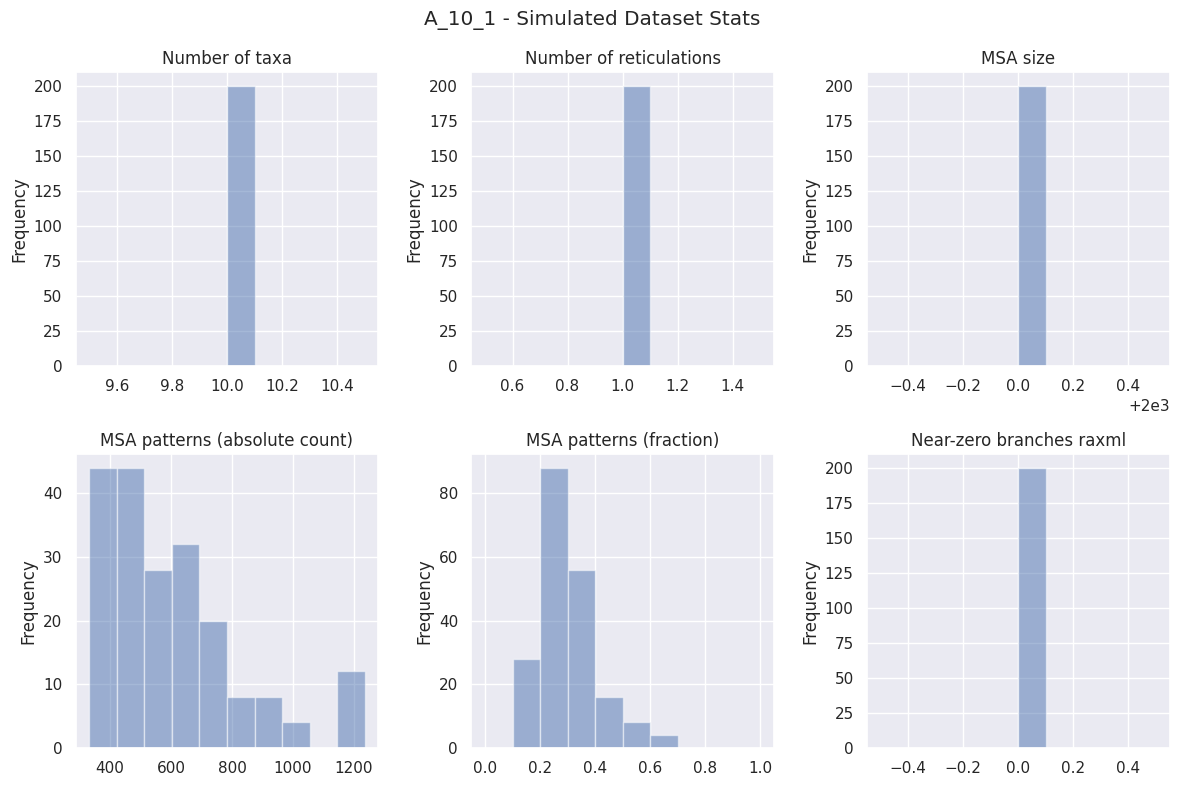

In [5]:
show_stats(filename, df)

# Evaluation starting from raxml-ng best tree

+----------------------------------+------------------------+---------------------+
|         A_10_1_norandom          | LikelihoodType.AVERAGE | LikelihoodType.BEST |
+----------------------------------+------------------------+---------------------+
|   Inferred BIC better or equal   |      24 (48.00 %)      |     25 (50.00 %)    |
|   Inferred AIC better or equal   |      20 (40.00 %)      |     21 (42.00 %)    |
|  Inferred AICc better or equal   |      20 (40.00 %)      |     21 (42.00 %)    |
|        Inferred BIC worse        |      26 (52.00 %)      |     25 (50.00 %)    |
|        Inferred AIC worse        |      30 (60.00 %)      |     29 (58.00 %)    |
|       Inferred AICc worse        |      30 (60.00 %)      |     29 (58.00 %)    |
|  Inferred logl better or equal   |      19 (38.00 %)      |     20 (40.00 %)    |
|       Inferred logl worse        |      31 (62.00 %)      |     30 (60.00 %)    |
|  Inferred n_reticulations less   |      9 (18.00 %)       |     12 (24.00 

<Figure size 1200x800 with 0 Axes>

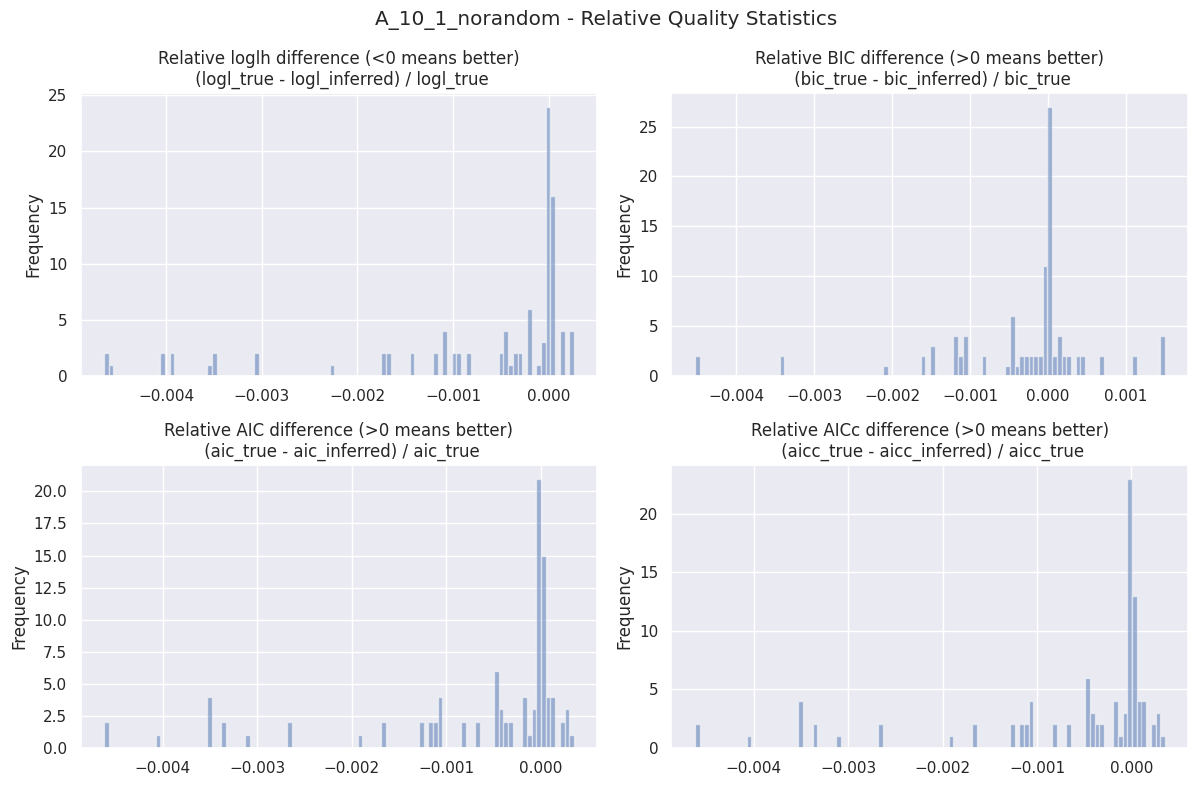

<Figure size 1200x800 with 0 Axes>

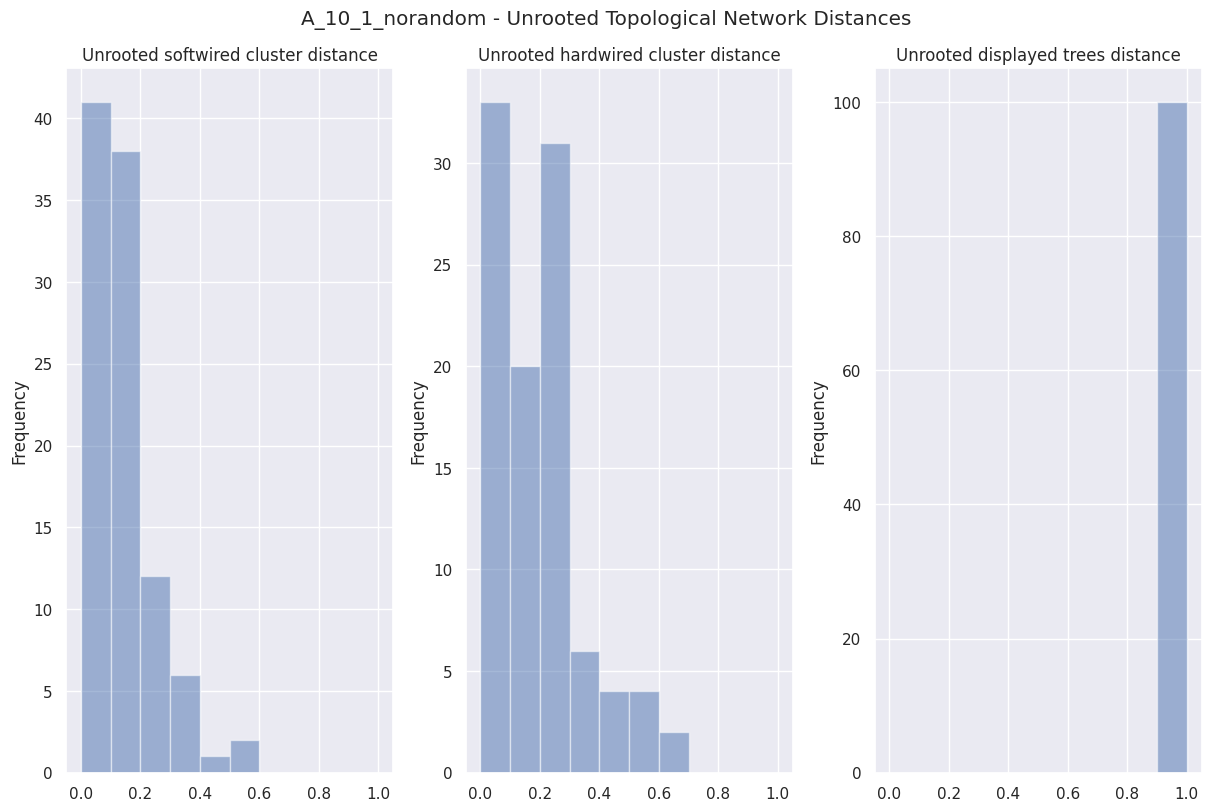

<Figure size 1200x800 with 0 Axes>

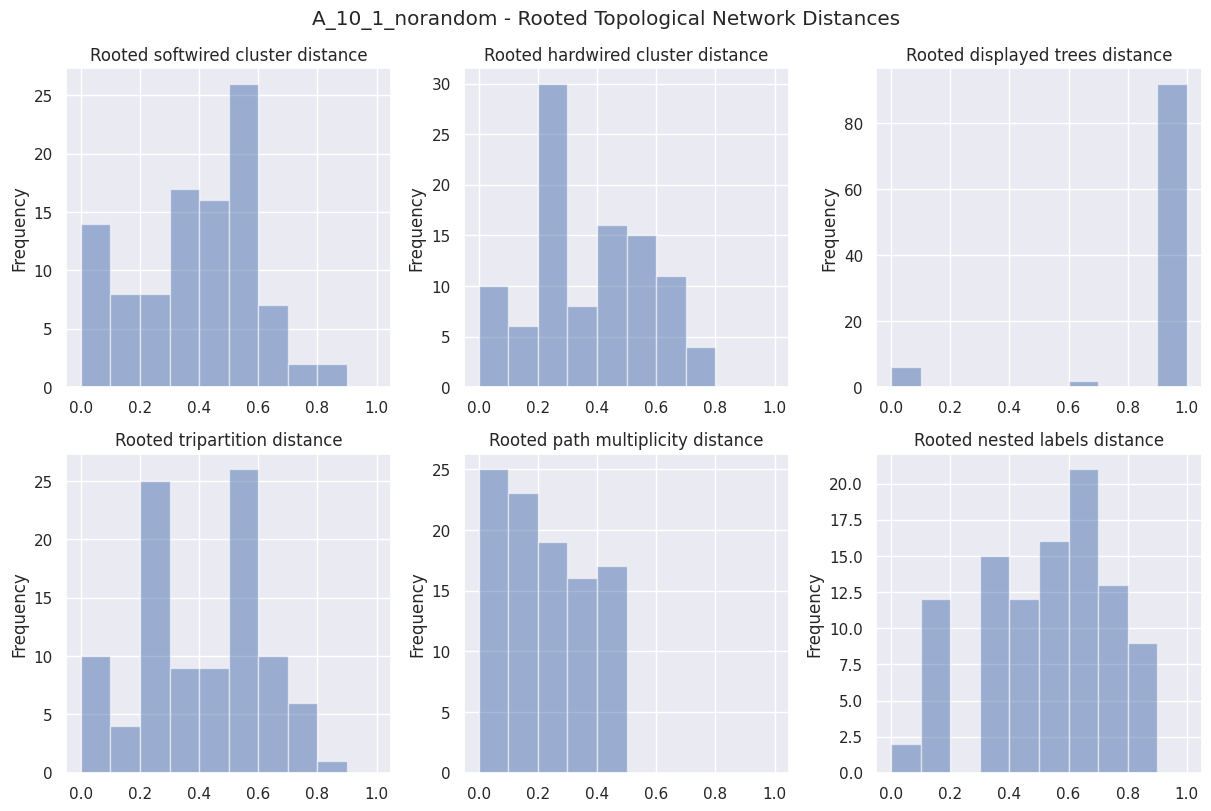

In [6]:
df_start_from_raxml = df.query('start_type == "FROM_RAXML"')
if len(df_start_from_raxml) > 0:
    show_plots(filename+"_norandom", df_start_from_raxml)
else:
    print("No data found for StartType.FROM_RAXML")

# Evaluation starting from 3 random + 3 parsimony trees

+----------------------------------+------------------------+---------------------+
|          A_10_1_random           | LikelihoodType.AVERAGE | LikelihoodType.BEST |
+----------------------------------+------------------------+---------------------+
|   Inferred BIC better or equal   |      27 (54.00 %)      |     28 (56.00 %)    |
|   Inferred AIC better or equal   |      23 (46.00 %)      |     24 (48.00 %)    |
|  Inferred AICc better or equal   |      23 (46.00 %)      |     24 (48.00 %)    |
|        Inferred BIC worse        |      23 (46.00 %)      |     22 (44.00 %)    |
|        Inferred AIC worse        |      27 (54.00 %)      |     26 (52.00 %)    |
|       Inferred AICc worse        |      27 (54.00 %)      |     26 (52.00 %)    |
|  Inferred logl better or equal   |      22 (44.00 %)      |     23 (46.00 %)    |
|       Inferred logl worse        |      28 (56.00 %)      |     27 (54.00 %)    |
|  Inferred n_reticulations less   |      7 (14.00 %)       |     7 (14.00 %

<Figure size 1200x800 with 0 Axes>

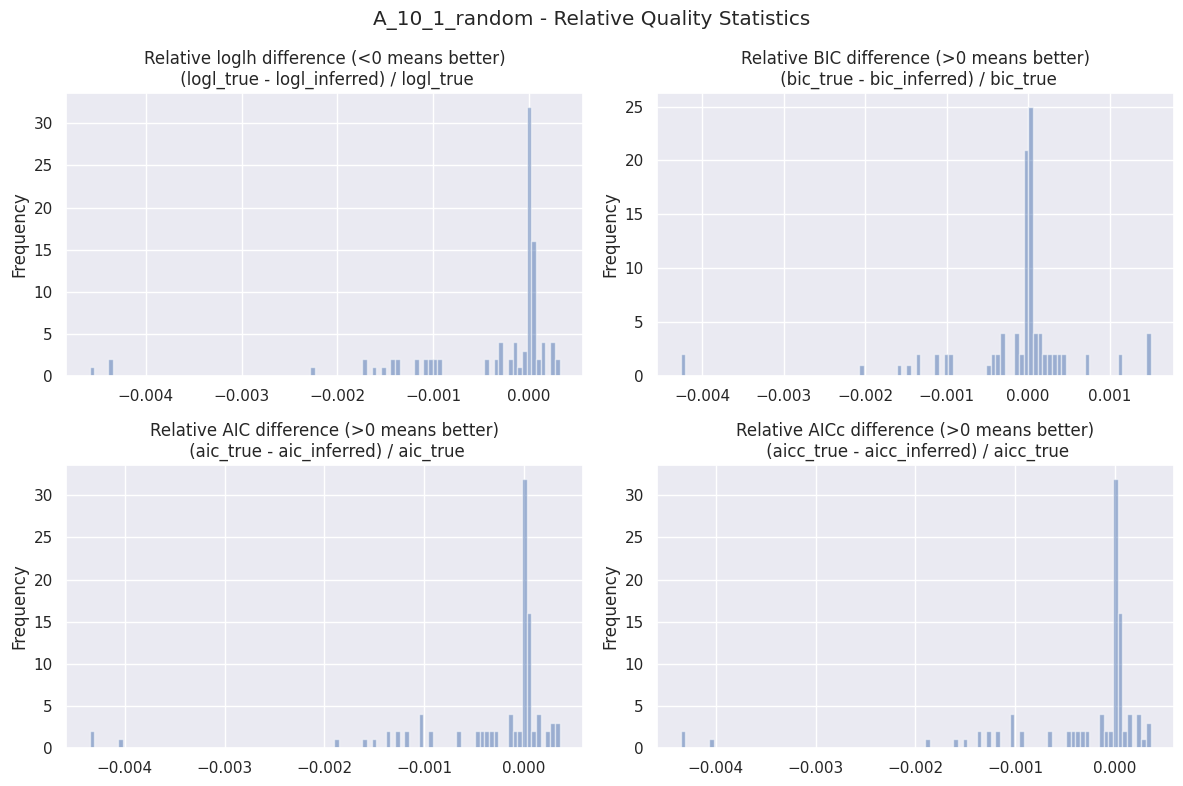

<Figure size 1200x800 with 0 Axes>

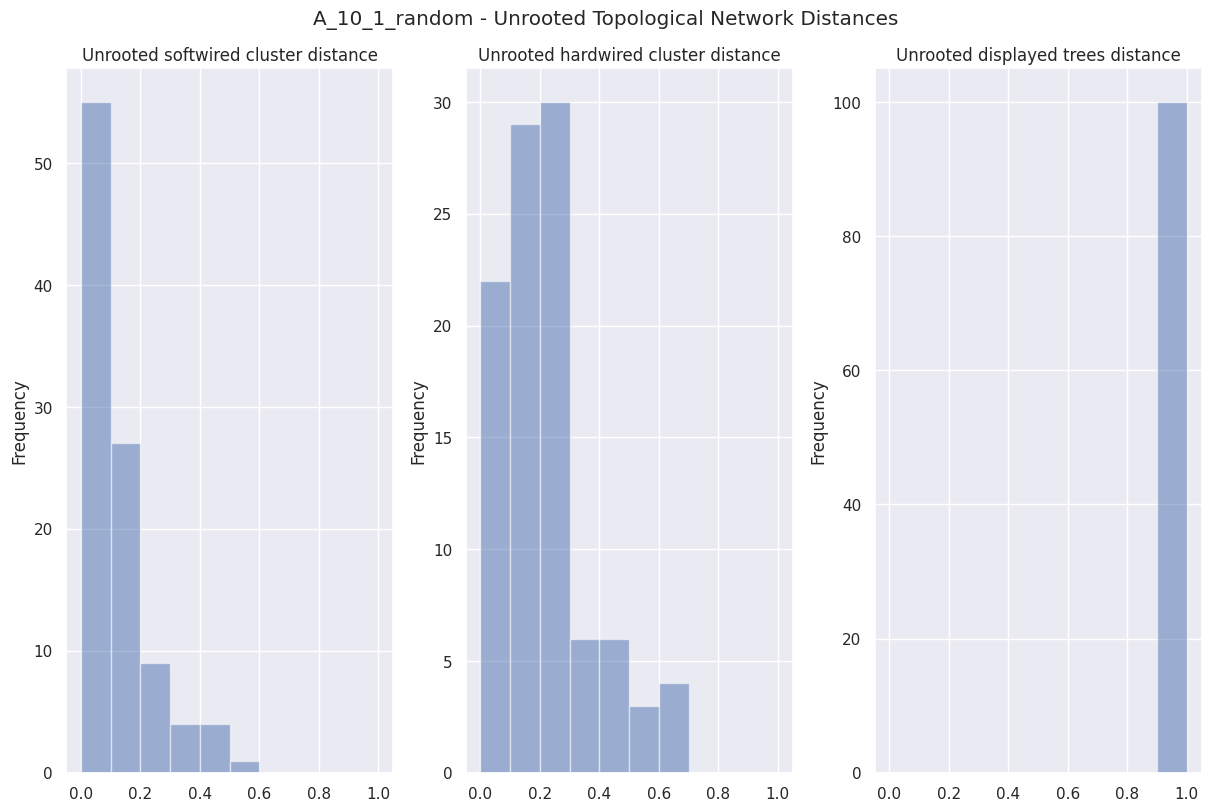

In [ ]:
df_random = df.query('start_type == "RANDOM"')

if len(df_random) > 0:
    show_plots(filename+"_random", df_random)
else:
    print("No data found for StartType.RANDOM")